In [0]:
#importing packages
from sklearn.model_selection import GridSearchCV
import pandas as pd
import os
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Ridge
from matplotlib import pyplot as plt
from sklearn import metrics
import seaborn as seabornInstance 
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [0]:
#setting directory path

os.chdir('U:\\final report\\with cheating variable')

In [0]:
#importing dataset

x=pd.read_excel('PCA_LUSC_L.xlsx',index_col=0)
y=pd.read_excel('survival_LUSC.xlsx')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


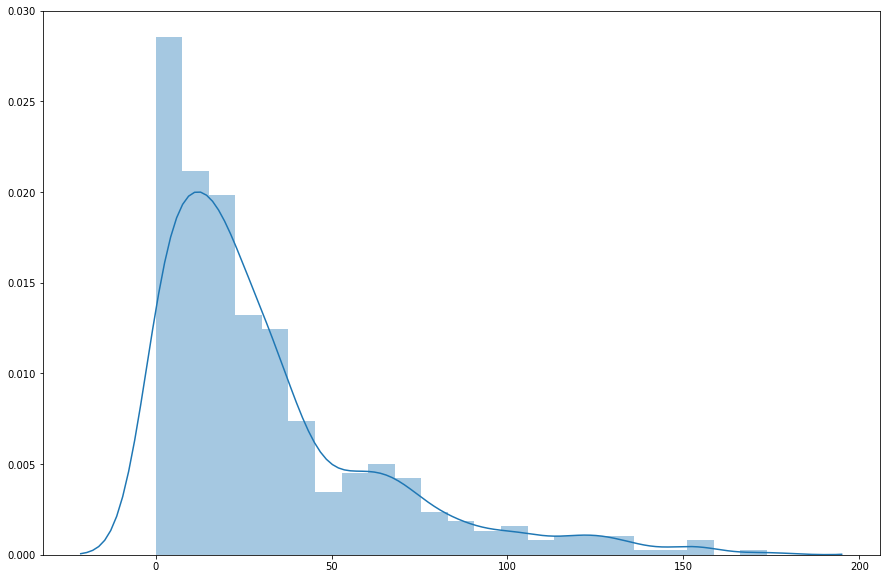

In [0]:
#plot distribution of data

plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(y)

In [0]:
#split data to train, test, validation split (80/20)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [0]:
#applyign linear regression model
ridgeReg=Ridge(alpha=1,normalize=False)
ridgeReg.fit(X_train, y_train) #training the algorithm

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [0]:
#predicting on validation split

y_predval = ridgeReg.predict(X_val)

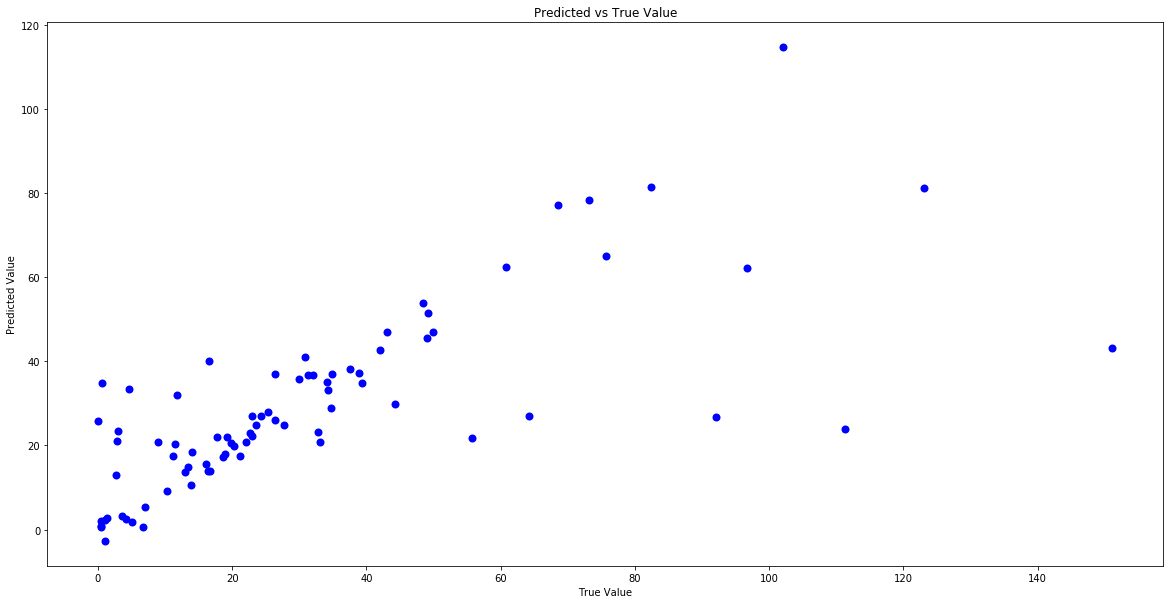

In [0]:
#True value ~ Predicted Value

plt.figure(figsize=(20,10))
plt.scatter(y_val, y_predval, color='blue', linewidth=2)
plt.title('Predicted vs True Value')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()

In [0]:
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))
print('Variance score: %.2f' % ridgeReg.score(X_val, y_val))

10.407984944896631
440.5238462802548
20.988659944842947
Variance score: 0.52


In [0]:
# KFOlD
estimator = ridgeReg
kfold = KFold(n_splits=2, random_state=0)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print(results)
print(results.mean(), results.std())


[0.66569137 0.58880385]
0.6272476108322489 0.038443761493509865


In [0]:
                     '''OPTIMISATION'''

In [0]:
# Hyper parameter optimization

tuned_parameters = {'alpha':[0.1,0.5,1.10,20,30,50,100],
                     'fit_intercept':[True,False],
                     'max_iter':[None,1,2,5,10],
                     'random_state':[0,1,42],
                      'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
                    'tol':[0.001,0.1,0.5]}
ridgeReg=Ridge()
grid=GridSearchCV(ridgeReg,tuned_parameters,scoring='r2',verbose=1)    
grid.fit(X_train,y_train)
print(grid.best_estimator_)

In [0]:
#creating model with best parameters

ridgeReg=Ridge(alpha= 100, fit_intercept= True, max_iter=None, random_state= 0, solver= 'lsqr', tol= 0.1)
ridgeReg.fit(X_train,y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=0, solver='lsqr', tol=0.1)

In [0]:
print(grid.best_params_)

{'alpha': 100, 'fit_intercept': True, 'max_iter': None, 'random_state': 0, 'solver': 'lsqr', 'tol': 0.1}


In [0]:
#getting scores

y_predval=ridgeReg.predict(X_val)
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))
print('Variance score: %.2f' % ridgeReg.score(X_val, y_val))

11.19101352150268
509.5214118006399
22.572580973398676
Variance score: 0.45


In [0]:
y_predval=grid.predict(X_val)

In [0]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))
print('Variance score: %.2f' % grid.score(X_val, y_val))

11.19101352150268
509.5214118006399
22.572580973398676
Variance score: 0.45


In [0]:
# KFOlD - Cross Validation scores

estimator = ridgeReg
kfold = KFold(n_splits=2, random_state=0)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print(results)
print(results.mean(), results.std())


[0.6367998  0.68127725]
0.6590385275243363 0.022238724842217228


In [0]:
                                  '''APPYING MODEL ON TESTING DATA SET'''
ridgeReg.fit(X_train, y_train)

# Predicting the Test set results
y_pred = ridgeReg.predict(X_test)

# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))

# Print result of MSE
print(metrics.mean_squared_error(y_test, y_pred))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Explained variance score: 1 is perfect prediction (Accuracy Score)
print('Variance score: %.2f' % ridgeReg.score(X_test, y_test))


12.550902313264851
500.22515272549236
22.36571377634732
Variance score: 0.49


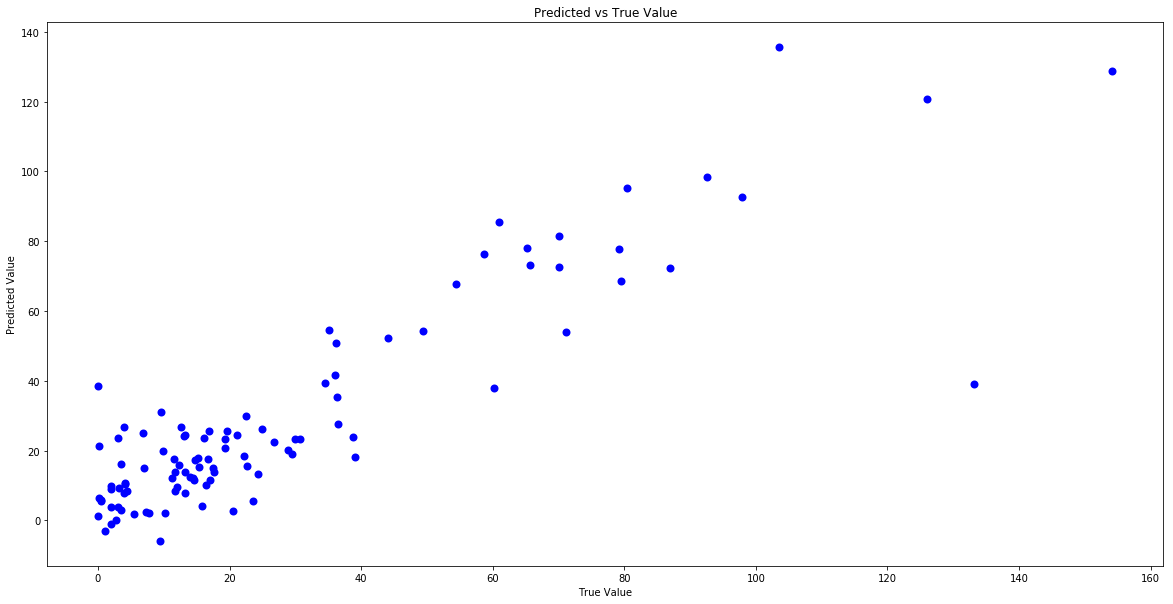

In [0]:
#True Value ~ Predicted Values

plt.figure(figsize=(20,10))
plt.scatter(y_test, y_pred, color='blue', linewidth=2)
plt.title('Predicted vs True Value')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()